In [160]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import squarify

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load('en_core_web_md') #very important to run spacy tokenizer

from bs4 import BeautifulSoup

In [4]:
import requests

In [134]:
data = pd.read_csv("data/job_listings.csv")

In [135]:
data.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [136]:
data = data.drop(['Unnamed: 0'], axis=1) #drop problematic column when deleting duplicates

In [137]:
data.shape

(426, 2)

In [138]:
len(data['description'].value_counts()) #duplicates????

356

In [139]:
data = data.drop_duplicates()

In [140]:
data.shape

(356, 2)

In [141]:
def beautiful_text(html):
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text().replace("\\n", ' ')[2:-1]
    return text

In [142]:
data['my_description'] = data['description'].apply(beautiful_text)

In [143]:
data.head()

,description,title,my_description
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...


In [144]:
len(data.title.value_counts()) #let's standarize the job titles and see how many we cut

177

In [145]:
import re

def only_alphanum_lower_shrink(coffee_shop_name):
    alphanum = re.sub('[^a-zA-Z 0-9]', '', coffee_shop_name)
    alphanum = re.sub(r"\s+", "", alphanum)
    return alphanum.lower()

data['my_title'] = data['title'].apply(only_alphanum_lower_shrink)

In [146]:
len(data['my_title'].value_counts()) #There were same titles written in lower and upper case

169

In [147]:
data.head()

,description,title,my_description,my_title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...,datascientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...",datascientisti
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,datascientistentrylevel
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...",datascientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...,datascientist


In [254]:
def tokenizer(text_col):
    
    tokens = []
    
    for doc in nlp.pipe(text_col):
        
        doc_tokens = []
        
        for token in doc:
            if (not token.is_punct) & (not token.is_stop) & (token.text != " "):
                doc_tokens.append(token.lemma_.strip().lower())
                
        tokens.append(doc_tokens)
    
    return tokens
    

In [255]:
data['tokens'] = tokenizer(data['my_description'])

In [150]:
data.head()

,description,title,my_description,my_title,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...,datascientist,"[job, requirement, conceptual, understanding, ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...",datascientisti,"[job, description, data, scientist, 1, help, b..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,datascientistentrylevel,"[data, scientist, work, consult, business, res..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...",datascientist,"[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA \xe2\x80\x93 multiple locations ...,datascientist,"[location, usa, \xe2\x80\x93, multiple, locati..."


In [151]:
data['my_title'].value_counts() 

datascientist                                      133
seniordatascientist                                 11
associatedatascientist                               7
datascientistintern                                  7
srdatascientist                                      7
                                                  ... 
datascientistmastersentrylevelconsultantatlanta      1
datascientisttopsecret                               1
datascientistalexashoppingnlu                        1
interndatascience                                    1
datascientistarvr                                    1
Name: my_title, Length: 169, dtype: int64

In [154]:
data = data[data['my_title'] == 'datascientist'] #ONLY "DATASCIENTIST' TITLE
data.shape

(133, 5)

In [156]:
from collections import Counter 

def count(Tokens): #STATS BUILDER
    
    word_counts = Counter()
    appears_in = Counter()
    
    for token in Tokens:
        word_counts.update(token) #stores count of each appearance of a work within a token 
        appears_in.update(set(token)) #using "set" to count avoiding duplicates of a word within a token 
        
    #WORD COUNT STATS
    temp = zip(word_counts.keys(), word_counts.values()) 
    wc = pd.DataFrame(temp, columns= ['word', 'count']) #creating df based on the tuple of tuples created with zip
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False) #using first because it's already organized from the beginning by Counter() 
    total_words = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda word_count: word_count/total_words) # pct of total instances of each word vs total words
    
    #cumulative % of total word count, starting from top to bottom ranked words
    wc = wc.sort_values(by='rank') #using rank as our reference to start from the top ranked word 
    wc['cum_pct_total'] = wc['pct_total'].cumsum()
    
    #DOCUMENT STATS 
    
    temp_2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(temp_2, columns=['word', 'appears_in'])
    
    wc = ac.merge(wc, on='word') #extending wc adding the instances per doc/token of a word 
    total_docs = len(Tokens)
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda instances: instances / total_docs)
    
    return wc.sort_values(by='rank') #sorted by most common words overall (not by unique instances per doc/token)
  

In [157]:
wc_data = count(data['tokens'])

In [158]:
wc_data

,word,appears_in,count,rank,pct_total,cum_pct_total,appears_in_pct
50,datum,129,840,1.0,0.020453,0.020453,0.969925
10,experience,123,558,2.0,0.013587,0.034039,0.924812
213,data,121,541,3.0,0.013173,0.047212,0.909774
39,work,122,480,4.0,0.011687,0.058899,0.917293
217,business,101,408,5.0,0.009934,0.068834,0.759398
...,...,...,...,...,...,...,...
4759,tb,1,1,4769.0,0.000024,0.999903,0.007519
4756,regional,1,1,4770.0,0.000024,0.999927,0.007519
4753,single,1,1,4771.0,0.000024,0.999951,0.007519
4770,"25,000",1,1,4772.0,0.000024,0.999976,0.007519


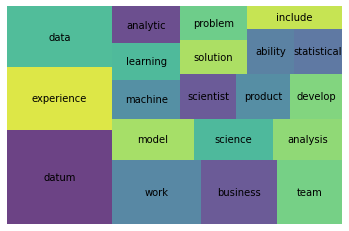

In [161]:
def square_top_20(tokens): #VISUALIZER
    wc = count(tokens)
    wc_top20 = wc[wc['rank'] < 21]
    
    squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
    plt.axis('off')
    return plt

square_top_20(data['tokens']).show()

In [171]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = list(data['my_description'])
vect = CountVectorizer()
vect.fit(corpus)
dtm = vect.transform(corpus)

In [172]:
dtm

<133x5685 sparse matrix of type '<class 'numpy.int64'>'
	with 34379 stored elements in Compressed Sparse Row format>

In [198]:
# Get feature names -- this is the "vocablulary" for the corpus
#print(vect.get_feature_names())

print(len(vect.get_feature_names()))

5685


In [199]:
#corpus

In [170]:
print(dtm)

  (0, 126)	2
  (0, 307)	1
  (0, 362)	2
  (0, 387)	2
  (0, 407)	1
  (0, 423)	1
  (0, 432)	1
  (0, 449)	1
  (0, 489)	1
  (0, 584)	1
  (0, 678)	1
  (0, 927)	1
  (0, 965)	1
  (0, 1031)	1
  (0, 1084)	1
  (0, 1091)	1
  (0, 1352)	1
  (0, 1384)	1
  (0, 1410)	1
  (0, 1629)	1
  (0, 1714)	1
  (0, 1862)	1
  (0, 1945)	2
  (0, 1955)	1
  (0, 1974)	1
  :	:
  (132, 5442)	1
  (132, 5456)	1
  (132, 5489)	1
  (132, 5505)	2
  (132, 5531)	1
  (132, 5534)	1
  (132, 5535)	1
  (132, 5539)	2
  (132, 5548)	3
  (132, 5549)	2
  (132, 5558)	10
  (132, 5560)	2
  (132, 5561)	1
  (132, 5567)	7
  (132, 5570)	1
  (132, 5573)	2
  (132, 5575)	1
  (132, 5593)	5
  (132, 5602)	2
  (132, 5622)	3
  (132, 5660)	5
  (132, 5665)	2
  (132, 5669)	1
  (132, 5674)	3
  (132, 5676)	1


In [178]:
from scipy import sparse as sparse

In [179]:
dtm_sparse_matrix = dtm
dtm_dense_matrix = dtm_sparse_matrix.todense()

In [180]:
dtm_dense_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]])

In [181]:
# Get Word Counts for each document
dtm_new = pd.DataFrame(dtm_dense_matrix, columns=vect.get_feature_names())
dtm_new

,00,000,0305,0356,062,08,10,100,1026036,10x,...,young,your,yours,yourself,yrs,zenreach,zeus,zheng,zogsports,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,1,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,0,0,1,0,0,0,0,0,0,0,...,0,3,0,0,3,0,0,0,0,0


In [183]:
#lenght of each doc " text description"
doc_len = [len(doc) for doc in list(data['my_description'])] #using list because it is a Series originally 

<AxesSubplot:>

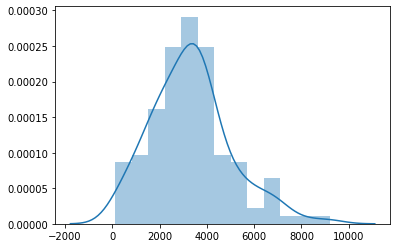

In [187]:
import seaborn as sns
sns.distplot(doc_len)

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer

def doc_tokenizer(document):
    doc = nlp(document)
    doc_tokens = []
    for token in doc:
        if (not token.is_punct) & (not token.is_stop) & (token.text != " "):
            doc_tokens.append(token.lemma_.strip().lower())
    return doc_tokens
    

tfidf = TfidfVectorizer(stop_words='english', max_features=5000, 
                        ngram_range=(1,2), max_df=.97, min_df=.03, tokenizer=doc_tokenizer) #the vectorizer requires a doc_tokenizer not col_tokenizer

dtm = tfidf.fit_transform(data['my_description']) 

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,,experience,$,+,+ year,1,1 year,10,100,2,...,year industry,year professional,year relevant,year work,years\xe2\x80\x99,years\xe2\x80\x99 experience,york,york city,you\xe2\x80\x99ll,you\xe2\x80\x99re
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.079418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.315862,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.126512,0.138233,0.0,0.0,0.0,0.0,0.159777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.025427,0.027782,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix = cosine_similarity(dtm)

df = pd.DataFrame(dist_matrix)

print(df.shape)

(133, 133)


In [229]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,1.000000,0.003542,0.056945,0.152992,0.063974,0.111836,0.060552,0.062919,0.059044,0.021400,...,0.163212,0.046696,0.068499,0.086376,0.111871,0.137575,0.049187,0.090177,0.087756,0.087313
1,0.003542,1.000000,0.016325,0.061145,0.150555,0.065594,0.086016,0.046810,0.096440,0.080126,...,0.087273,0.129089,0.060139,0.151570,0.070543,0.027532,0.082521,0.114126,0.172988,0.166492
2,0.056945,0.016325,1.000000,0.066120,0.062177,0.092768,0.065716,0.083159,0.028598,0.055483,...,0.112881,0.036770,0.058197,0.067318,0.087065,0.044878,0.140226,0.094166,0.086512,0.066913
3,0.152992,0.061145,0.066120,1.000000,0.095097,0.189068,0.137225,0.149425,0.101250,0.124473,...,0.215671,0.179823,0.146353,0.176231,0.184587,0.110885,0.129045,0.228594,0.166213,0.125996
4,0.063974,0.150555,0.062177,0.095097,1.000000,0.155101,0.219612,0.182538,0.089714,0.113091,...,0.140132,0.169965,0.123915,0.199121,0.252381,0.086245,0.109362,0.215121,0.230384,0.213628


In [228]:
df[0][:3]

0    1.000000
1    0.003542
2    0.056945
Name: 0, dtype: float64

In [214]:
df[:][0].sort_values(ascending=False)[:10] #top10 most similar docs to the first doc [0]

0      1.000000
35     0.203848
55     0.186622
14     0.172810
123    0.163212
96     0.155728
3      0.152992
27     0.148212
122    0.140874
128    0.137575
Name: 0, dtype: float64

In [241]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=6, algorithm='kd_tree') # if we want 5 nearest neighbors we set it at 6 on the parameter; it includes the original

nn.fit(dtm) #fit the whole dtm 

doc_index = 2
doc = [dtm.iloc[doc_index].values] #set the doc to query 

neigh_dist, neigh_index = nn.kneighbors(doc) # get values 

In [244]:
#print results 
print (neigh_index, neigh_dist)

[[  2 118 129 102  98  19]] [[0.         1.30677234 1.31131548 1.31606285 1.31722053 1.32222559]]


In [253]:
for _,__ in zip(neigh_index[0], neigh_dist[0]):
    print ("index:", _ ,"------" , "cos_similarity", __)

index: 2 ------ cos_similarity 0.0
index: 118 ------ cos_similarity 1.3067723367482156
index: 129 ------ cos_similarity 1.3113154838120924
index: 102 ------ cos_similarity 1.3160628467796358
index: 98 ------ cos_similarity 1.3172205280677451
index: 19 ------ cos_similarity 1.3222255870346251


In [250]:
def similar_jobs("")

my_job = "flexible, good culture, finance related, blockchain"